In [98]:
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib
# !pip install json

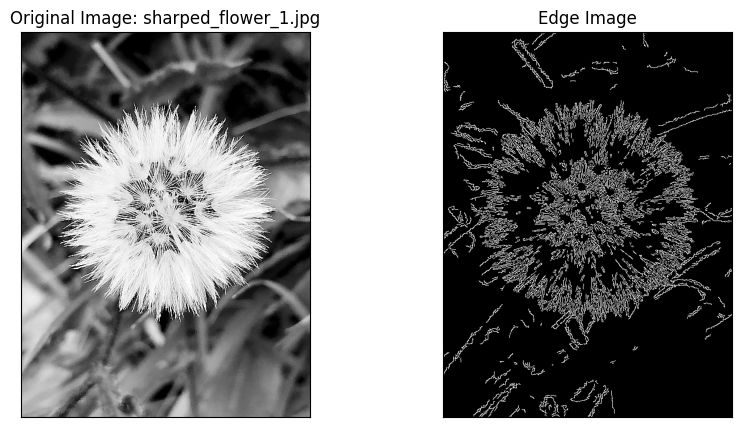

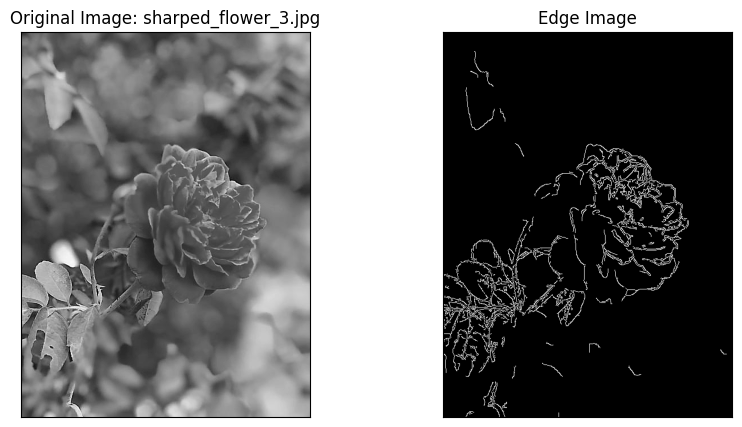

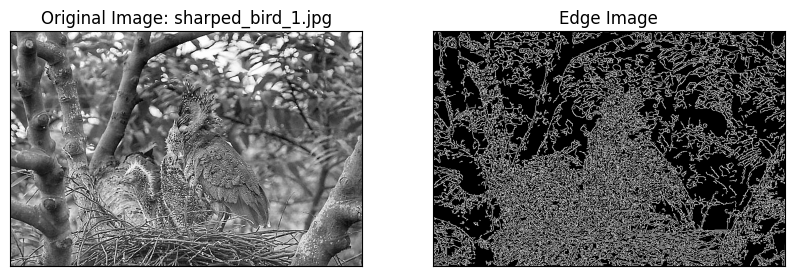

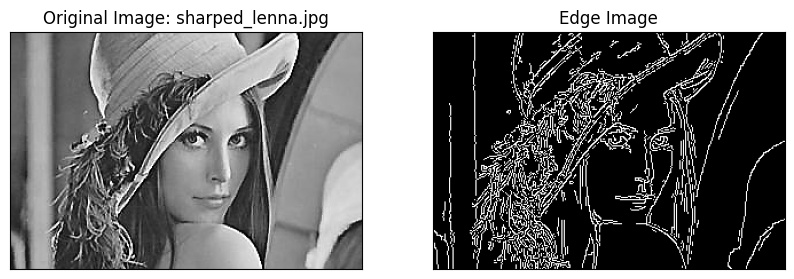

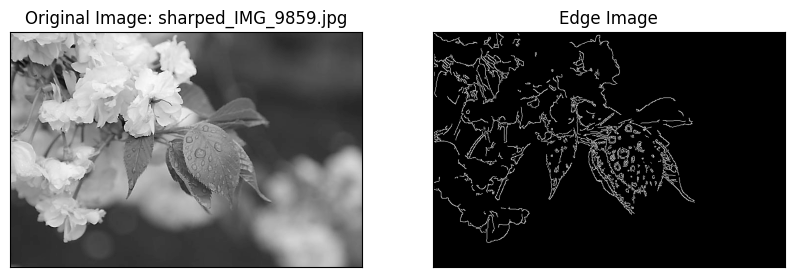

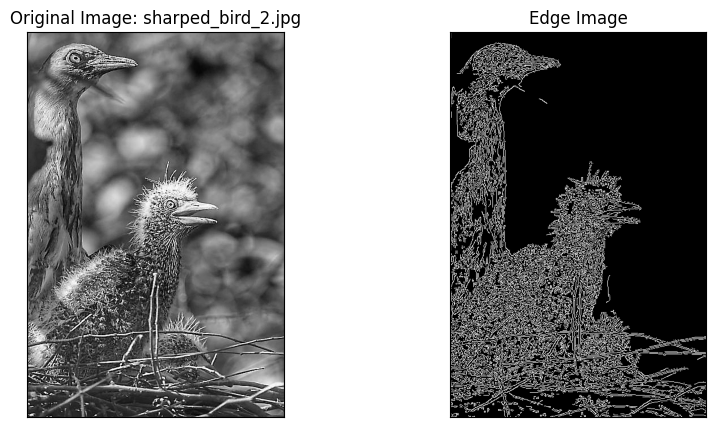

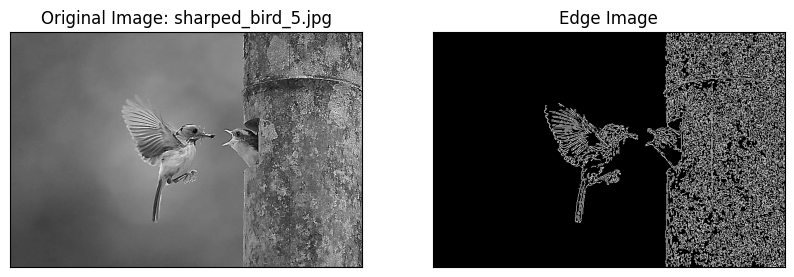

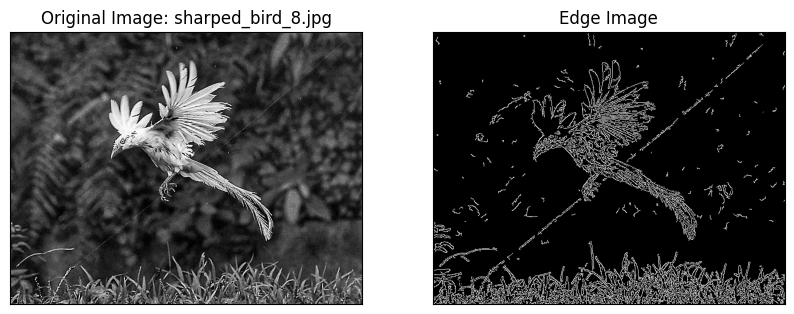

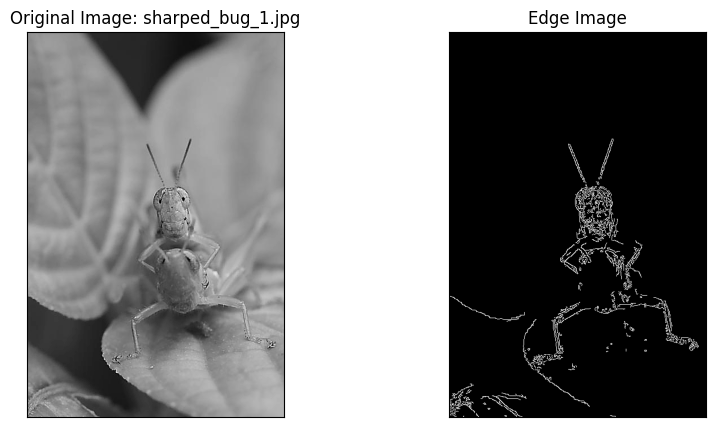

[]


In [15]:
# Process all image in the folder.
import os
from matplotlib import pyplot as plt 
import cv2 as cv
img_folder_name = "Sharpening_images" #Change to the leaf folder name you use
image_folder = './Sharpening/'+ img_folder_name + '/' 
output_folder = './Output/output_Edge_' + img_folder_name
error_json = 'error_image'
err_list = []
for filename in os.listdir(image_folder):
    
    img_path = os.path.join(image_folder,filename)
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if img is None:
            # print(f"Warning: File {filename} could not be read, skipping.")
            result_json = {
                "img_name": filename,
            }
            err_list.append(result_json)
            continue
    if not os.path.exists(output_folder):
          os.makedirs(output_folder)
    edges = cv.Canny(img,100,200)
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title(f'Original Image: {filename}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.savefig(output_folder+'/Edge_'+filename)
    plt.show()
print(err_list)
with open(output_folder+'/'+error_json,'+a') as f:
      json.dump(err_list,f,indent=1)
